# Module 1c Masking & Histogram
****

Let's use our Python Slicing and Histogram knowledge to create a mask and analyze an image.

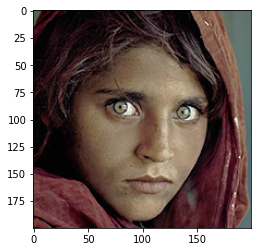

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import an image
img = cv2.imread("../Graphics/face.png")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Let's do the conversion in imshow
plt.imshow(img)


Let's analyze the full image's HSV histogram.

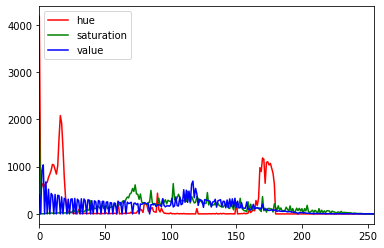

In [93]:
# Convert to HSV
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Create a histogram of HSV values.

# Hue
hist = cv2.calcHist([img],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

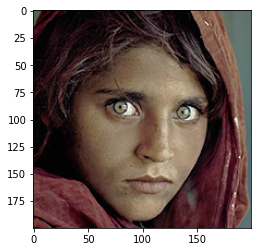

In [96]:
# Import the face image.
img = cv2.imread('../Graphics/face.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the image.
plt.imshow(img)

### Create Masks and Bounding Boxes on the Image.

This allows us to analyze specific portions of the image.  We will draw a rectangle and circle on the image.  Then we will use the rectangle coordinates to create a mask on our image.  Using this mask we can analyze the histogram of this region.

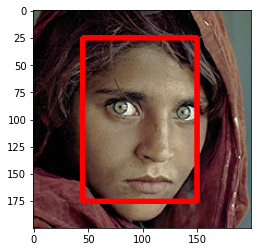

In [97]:
# Rectangle OpenCv function
# cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Top left corner of rectangle
top_left = (45,25)

# Bottom right corner of rectangle
bottom_right = (150,175)

# Color
rect_color = (255,0,0)

# Thickness
thickness = 3

# Rectangle function
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Plot image
plt.imshow(img_rect)

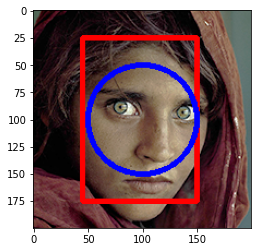

In [98]:
# Circle function
# cv2.circle(img, center_circle, radius, circle_color, thickness)

# Center of circle
center_circle = (100,100)

# Radius of the circle
radius = 50

# Color
circle_color = (0, 0, 255)

# Add circle to image
img_circle = cv2.circle(img, center_circle, radius, circle_color, thickness)


# Plot image
plt.imshow(img_circle)

# CREATE A MASK!

First let's using Python array slicing to crop out a portion of our image. 

In [99]:
# Paste the rectangle coordinates so you can reference them.

# Top left corner of rectangle
# top_left = (45,25)

# Bottom right corner of rectangle
# bottom_right = (150,175)

# Import the face image.
img = cv2.imread('../Graphics/face.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


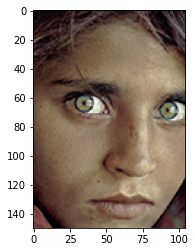

In [100]:
img_masked = img[25:175, 45:150]

plt.imshow(img_masked)

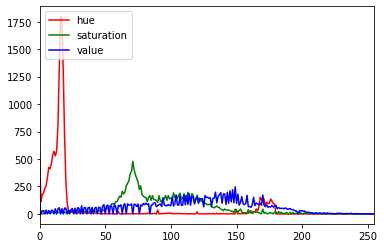

In [101]:
# Create a histogram of HSV values.
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

Let's create a mask using a separate array that is a binary image.  Each pixel is either 0 or 255. 

In [102]:
#Create an empty 2D array filled with zeros the same shape as our image.  Notice we are defining the data type as uint8 now!
mask = np.zeros(img.shape[:2], np.uint8) 

# Set the masked to white. Remember black is 0 and white is 255 is 8 bit color.

mask[25:175, 45:150] = 255

# Image shape to confirm it's the same size as our image.
print(mask.shape)

(200, 200)


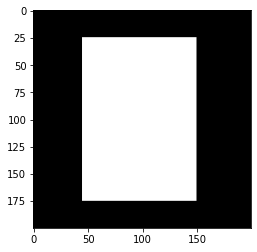

In [103]:
# Plot mask. Make sure you tell matplotlib that you it only contains gray values.  
plt.imshow(mask, cmap="gray")

### Masking and the Bitwise AND

The cv2.bitwise_and function performs a bitwise AND operation between two arrays (in this case, images). The function is often used for masking operations. Here's the breakdown of how it works:

Function Signature:

dst = cv2.bitwise_and(src1, src2, mask)

Parameters:

- src1: First source array (image).
- src2: Second source array (image).
- mask: Optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.

What It Does:

The function calculates the per-element bit-wise conjunction of two arrays or an array and a scalar. In simpler terms, for each channel of each pixel in src1 and src2, it calculates the bitwise AND (&) operation.

For example, if we have a single pixel at location (x, y) in both src1 and src2, whose blue channel values are 11001011 and 10101101 in binary, the resulting blue channel value in dst at (x, y) would be 10001001 (calculated as 11001011 & 10101101).

Masking:

When a mask is provided, the function uses it to decide which pixels to operate upon in src1 and src2. If the mask has a zero at a particular location (i, j), then the pixel value at (i, j) in the output image (dst) will be set to zero for all channels. Otherwise, the bitwise AND operation is performed for the corresponding pixels in src1 and src2.

In Your Case:

img_masked = cv2.bitwise_and(img, img, mask=mask)

Here img is the source image upon which you want to apply the mask. The function performs a bitwise AND operation between img and itself (img) but only considers pixels where the corresponding value in the mask is non-zero.

- If the mask value at a certain pixel is zero, the corresponding pixel value in the output image img_masked will be set to zero (black).
- If the mask value at a certain pixel is non-zero, the corresponding pixel value in the output image img_masked will be the same as that in the input image img.

This effectively "masks" the input image img, setting pixels to black where the mask is zero.


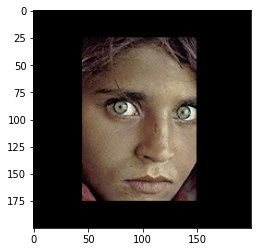

In [106]:
# Let's add our mask to our image.

# Import the face image again.
img = cv2.imread("../Graphics/face.png")

# Convert our image to RGB so we can plot it.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# The bitwise AND operator ( & ) compares each bit of the first operand to the corresponding bit of the second operand. 
# If both bits are 1, the corresponding result bit is set to 1. Otherwise, the corresponding result bit is set to 0. 
# First image to compare.  Second image to compare.  Mask to use. 
img_masked = cv2.bitwise_and(img, img, mask=mask)

# Plot the masked image.
plt.imshow(img_masked)

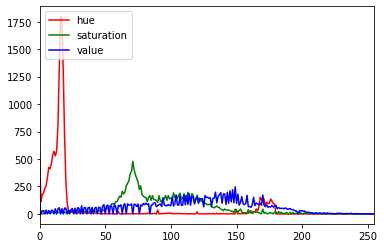

In [109]:
# Create a histogram of HSV values.
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

### Image Pipeline

<ol>
<li> Take a picture of your face or have a friend do it.</li>
<li> Import the image into Jupyter Notebook. </li>
<li> Analyze the image </li>
<li> Create a histogram of the whole image. RGB </li>
<li> Modify your image with brightness and contrast. </li>
<li> Mask out your face. </li>
<li> Use the mask to create a HSV histogram. </li>
<li> Analyze the histogram for skin tone ranges. </li>
<li> Use the HSV ranges to create a mask. </li>
<li> Apply the mask to the image and segment out your skin/face </li>
<ol>